In [1]:
%pip install tensorflow scikit-learn matplotlib seaborn pandas numpy --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# 2. ĐỌC DỮ LIỆU ĐẶC TRƯNG
df = pd.read_csv(r"D:\DEEPFAKE_PROJECT\SER_Project\data_preprocessing\ravdess_features.csv")
print("Tổng số mẫu:", len(df))
df.head()

Tổng số mẫu: 1440


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,emotion
0,-726.217224,68.541420,3.293398,12.205300,5.510278,13.667408,-2.983828,3.098029,-3.310813,-1.564384,...,0.759382,0.733590,14.859834,8.485176,11.536135,13.140823,14.896630,15.938653,17.161146,neutral
1,-719.128296,70.201569,1.168397,13.122541,7.836950,14.411290,-4.111360,4.468973,-3.539367,-3.658607,...,0.772159,0.744746,15.131423,9.101594,12.306145,13.242768,14.797068,16.028111,17.303416,neutral
2,-714.995728,69.689346,3.924564,11.924190,6.421723,11.011614,-2.878103,4.509558,-4.476109,-2.671549,...,0.719798,0.723376,14.471466,9.088758,12.077312,13.564629,15.356175,16.092042,17.107516,neutral
3,-710.975281,67.564880,5.782241,13.230726,6.190845,12.628252,-1.675169,5.657494,-4.950634,-3.477545,...,0.742405,0.765174,16.239611,8.943198,12.414027,14.054614,15.625618,15.486327,17.372365,neutral
4,-759.921753,75.783524,6.023605,14.557394,6.454187,14.631508,-3.004551,4.620970,-5.200016,-0.707430,...,0.775044,0.727207,15.227692,9.126893,12.107234,13.334177,15.277864,15.372324,16.627257,calm


In [11]:
# 3. TIỀN XỬ LÝ DỮ LIỆU
# Tách đặc trưng và nhãn
X = df.drop(columns=['emotion']).values
Y = df['emotion'].values
# Chuẩn hóa dữ liệu đầu vào
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Mã hóa nhãn cảm xúc thành số (Label Encoding)
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)
# Chia train/test (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42, stratify=Y_encoded)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_test.shape)

Kích thước tập huấn luyện: (1152, 59)
Kích thước tập kiểm thử: (288, 59)


In [12]:
# 4. THIẾT KẾ MẠNG NƠ-RON
# Sử dụng mô hình MLP (Multilayer Perceptron) - baseline cơ bản mạnh mẽ

n_features = X_train.shape[1]
n_classes = len(np.unique(Y_encoded))

model = Sequential([
    Dense(256, activation='relu', input_shape=(n_features,)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        15,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,032 (222.78 KB)

 Trainable params: 57,032 (222.78 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 5. HUẤN LUYỆN MÔ HÌNH
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1835 - loss: 2.0641 - val_accuracy: 0.2511 - val_loss: 1.9494
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2617 - loss: 1.9043 - val_accuracy: 0.3117 - val_loss: 1.8272
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3453 - loss: 1.7500 - val_accuracy: 0.3766 - val_loss: 1.6814
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3920 - loss: 1.6458 - val_accuracy: 0.4372 - val_loss: 1.5746
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4332 - loss: 1.5347 - val_accuracy: 0.4762 - val_loss: 1.4822
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4604 - loss: 1.4443 - val_accuracy: 0.4892 - val_loss: 1.4440
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5125 - loss: 1.3597 - val_accuracy: 0.5238 - val_loss: 1.3594
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5494 - loss: 1.2644 - val_accuracy: 0.5152 - 


Độ chính xác trên tập kiểm thử: 60.07%
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


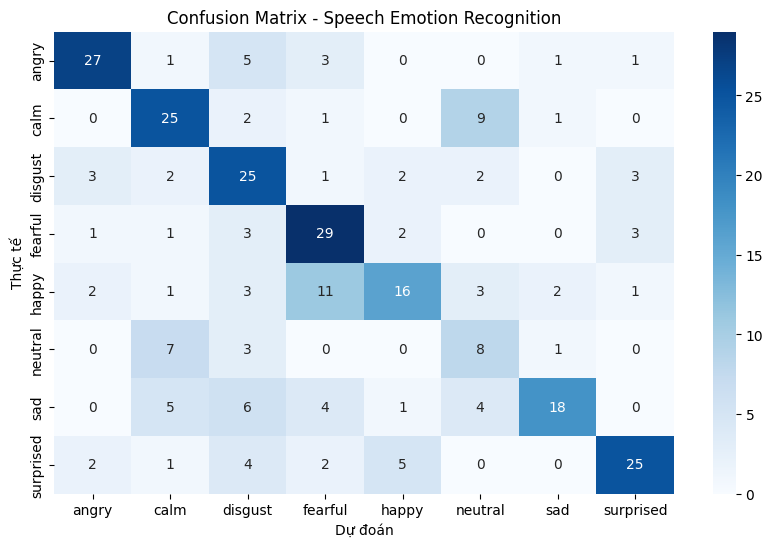


Báo cáo phân loại:
              precision    recall  f1-score   support

       angry       0.77      0.71      0.74        38
        calm       0.58      0.66      0.62        38
     disgust       0.49      0.66      0.56        38
     fearful       0.57      0.74      0.64        39
       happy       0.62      0.41      0.49        39
     neutral       0.31      0.42      0.36        19
         sad       0.78      0.47      0.59        38
   surprised       0.76      0.64      0.69        39

    accuracy                           0.60       288
   macro avg       0.61      0.59      0.59       288
weighted avg       0.63      0.60      0.60       288



In [14]:
# 6. ĐÁNH GIÁ HIỆU NĂNG
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"\nĐộ chính xác trên tập kiểm thử: {test_acc*100:.2f}%")

# Dự đoán
Y_pred = np.argmax(model.predict(X_test), axis=1)

# Ma trận nhầm lẫn
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Speech Emotion Recognition")
plt.show()

# Báo cáo chi tiết
print("\nBáo cáo phân loại:")
print(classification_report(Y_test, Y_pred, target_names=encoder.classes_))

In [15]:
# 7. LƯU MÔ HÌNH
model.save("ser_mlp_model.h5")
print("Đã lưu mô hình huấn luyện: ser_mlp_model.h5")

Đã lưu mô hình huấn luyện: ser_mlp_model.h5


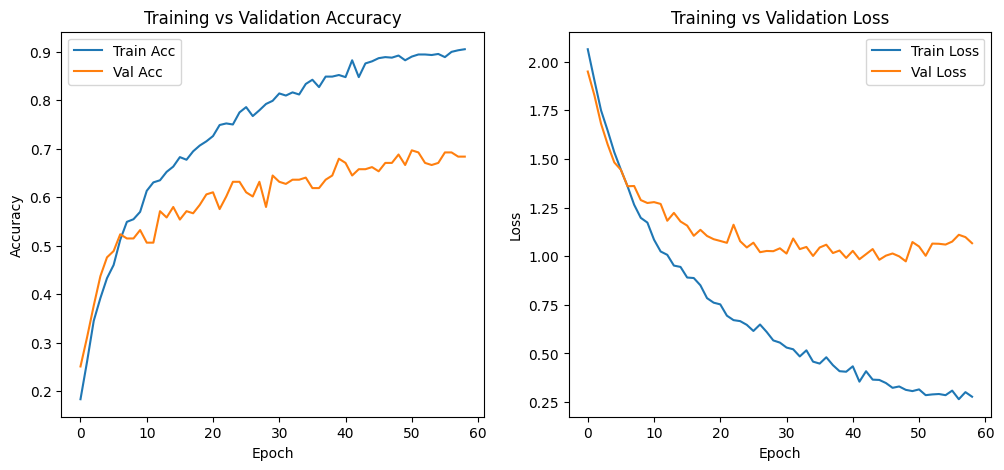

In [16]:
# 8. TRỰC QUAN HÓA QUÁ TRÌNH HUẤN LUYỆN
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()